# Other Adaptations of Bivariate Plots

You also saw earlier in this section one other way of expanding univariate plots into bivariate plots by substituting count on a [bar chart](https://github.com/A2Amir/Data-Visualization-in-Data-Science-Process/blob/master/Code/Adapted%20Bar%20Charts.ipynb) or [histogram](https://github.com/A2Amir/Data-Visualization-in-Data-Science-Process/blob/master/Code/Adapted%20Histograms.ipynb) for the mean, median, or some other statistic of a second variable. This adaptation can also be done for bivariate plots like the heat map, clustered bar chart, and line plot, to allow them to depict multivariate relationships.

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('../Code/fuel-econ.csv')
sedan_classes = ['Minicompact Cars','Subcompact Cars','Compact Cars','Midsize Cars','Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
df.VClass = df.VClass.astype(vclasses)
df['trans_type'] = df.trans.apply(lambda x: x.split()[0])
df.head(5)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


If we want to depict the mean of a third variable in a 2-d histogram, we need to change the weights of points in the hist2d function similar to how we changed the weights in [this 1-d histogram](https://github.com/A2Amir/Data-Visualization-in-Data-Science-Process/blob/master/Code/Adapted%20Histograms.ipynb).

In [52]:
ybin_edges = np.arange(df.comb.min(), df.comb.max()+2, 2 )
xbin_edges = np.arange(df.displ.min(), df.displ.max()+0.5, 0.5 )

# in each bin each point falls
ybin_idxs = pd.cut(df.comb, ybin_edges, right= False, include_lowest = True, labels = False).astype(int)
xbin_idxs = pd.cut(df.displ, xbin_edges, right= False, include_lowest=False, labels = False).astype(int)

# count number of points in each bin 
n_points = df.groupby([xbin_idxs,ybin_idxs]).size()
n_points = n_points.reset_index().pivot(index='displ', columns='comb').values

co2_weights = df.co2 / n_points[xbin_idxs,ybin_idxs]

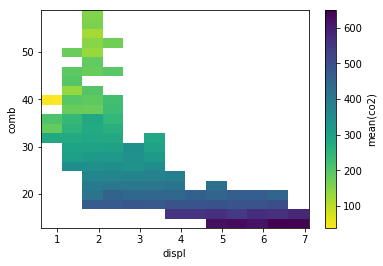

In [56]:
# plot the data using the calculated weights
plt.hist2d(data = df, x = 'displ', y = 'comb', weights = co2_weights,
           bins = [xbin_edges, ybin_edges], cmap = 'viridis_r', cmin = 0.5);
plt.xlabel('displ')
plt.ylabel('comb');
plt.colorbar(label = 'mean(co2)');

In [47]:
n_points

array([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,   4.,   6.,
          5.,  nan,   3.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,   8.,  33.,  67.,  80.,  44.,
         22.,   9.,   3.,   8.,   7.,   2.,  nan,   4.,  nan,  nan,  nan,
         nan],
       [ nan,  nan,   3.,  12.,  30., 161., 333., 321., 220., 117.,  54.,
         20.,  16.,  14.,  18.,  nan,   6.,   4.,   3.,   4.,   4.,   3.,
          2.],
       [ nan,  nan,   2.,   7.,  13.,  72.,  77.,  60.,  44.,  19.,   1.,
         14.,   5.,  17.,  nan,  nan,   1.,  nan,  nan,   1.,  nan,  nan,
         nan],
       [ nan,  nan,  16., 101., 191., 164.,  37.,   6.,  13.,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan],
       [ nan,  nan,  12.,  65., 280., 102.,  25.,   8.,  16.,   8.,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan],
       [ nan,   8.,  4

In [43]:
n_points

0                                                              ...   \
comb     0     1     2      3      4      5      6      7      8      9  ...    
displ                                                                    ...    
0       NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    4.0 ...    
1       NaN   NaN   NaN    NaN    NaN    NaN    8.0   33.0   67.0   80.0 ...    
2       NaN   NaN   3.0   12.0   30.0  161.0  333.0  321.0  220.0  117.0 ...    
3       NaN   NaN   2.0    7.0   13.0   72.0   77.0   60.0   44.0   19.0 ...    
4       NaN   NaN  16.0  101.0  191.0  164.0   37.0    6.0   13.0    NaN ...    
5       NaN   NaN  12.0   65.0  280.0  102.0   25.0    8.0   16.0    8.0 ...    
6       NaN   8.0  46.0  119.0   96.0    6.0    NaN    NaN    NaN    NaN ...    
7       NaN  25.0  74.0   61.0    NaN    NaN    NaN    NaN    NaN    NaN ...    
8       1.0  20.0  98.0   53.0    2.0    NaN    NaN    NaN    NaN    NaN ...    
9       3.0   3.0  35.0    7.0    NaN    NaN    NaN    NaN    NaN    NaN ...    
10     22.0  37.0  18.0   12.0    NaN    NaN    NaN    NaN    NaN    NaN ...    
11     26.0  53.0  40.0    6.0    NaN    NaN    NaN    NaN    NaN    NaN ...    
12     29.0   2.0   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN ...    

                                                           
comb     13    14   15   16   17   18   19   20   21   22  
displ                                                      
0       3.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1       3.0   8.0  7.0  2.0  NaN  4.0  NaN  NaN  NaN  NaN  
2      14.0  18.0  NaN  6.0  4.0  3.0  4.0  4.0  3.0  2.0  
3      17.0   NaN  NaN  1.0  NaN  NaN  1.0  NaN  NaN  NaN  
4       NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5       NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6       NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
7       NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
8       NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
9       NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
10      NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
11      NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
12      NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[13 rows x 23 columns]